# Frequenzmodulation

## Fourier-Reihenentwicklung für monofrequentes Informationssignal

Eine analytische Beschreibung des Spektrums von FM-Signalen ist nur für monofrequente Informationssignale möglich. Das Informationssignal $u(t)$ sei daher ein einfaches Kosinussignal der Form

\begin{equation*}
    u(t) = \cos(\omega_1 t) \; .
\end{equation*} 

Wie das Informationssignal sind auch das modulierte Signal

\begin{align*}
    x_{\mathrm{FM}}(t) 
    &= \mathrm{Re} \left\{ e^{j (\omega_0t + \varphi_0 + \Delta \Omega \int_0^t u(t') dt')} \right\} 
     = \mathrm{Re} \left\{ e^{j (\omega_0t + \varphi_0 + \frac{\Delta \Omega}{\omega_1} \sin(\omega_1t))} \right\} \\
    &= \mathrm{Re} \left\{ e^{j \eta \sin(\omega_1t)} \cdot e^{j (\omega_0t + \varphi_0)} \right\} 
     = \cos \left( \omega_0t + \varphi_0 + \eta \sin(\omega_1t) \right) 
\end{align*}

sowie die komplexe Einhüllende $e^{j \eta \sin(\omega_1t)}$ periodisch. Somit können Sie durch eine Fourier-Reihe dargestellt werden.

\begin{align*}
    e^{j \eta \sin(\omega_1t)}
    &= \sum_{\nu=-\infty}^{\infty} c_{\nu} \cdot e^{j \eta \nu \omega_1t}
\end{align*}

mit den Fourier-Koeffizienten

\begin{align*}
    c_{\nu} &= \frac{1}{2 \pi} \cdot \int_{-\pi}^{\pi} e^{j \eta \sin(\omega_1t)} \cdot e^{-j \nu \omega_1 t} dt \; .
\end{align*}

Die Lösung des letzten Integrals sind die Bessel-Funktionen erster Art und Ordnung $\nu$.


\begin{align*}
    J_{\nu}(\eta) &= \frac{1}{2 \pi} \cdot \int_{-\pi}^{\pi} e^{j (\eta \sin(x) - \nu x)} \cdot e^{-j \omega t} dt \; .
\end{align*}

Sie besitzen die Symmetrieeigenschaft $J_{-\nu}(\eta) = (-1)^{\nu} J_{\nu}(\eta)$. Die Bessel-Funktionen sind im unteren Bild für $0 \leq \eta \leq 20$ und $0 \leq \nu \leq 10$ dargestellt.

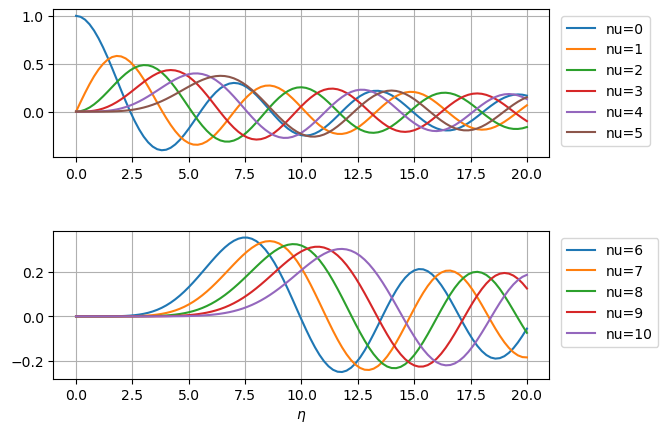

In [4]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

# Modulationsindex
eta = np.linspace(0,20,101)

nu = np.arange(11,dtype=int)

bessel = np.zeros((len(eta),len(nu)))
for run in nu:
    bessel[:,run] = special.jv(run,eta)
    
# graphische Darstellung
fig = plt.figure()
plt.subplots_adjust(hspace=0.5)

ax1 = fig.add_subplot(211)
for run in nu[0:6]:
    ax1.plot(eta,bessel[:,run],label="nu=%g" %(run))
plt.grid(True)
#plt.xlim((-1.0,1.0))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

ax2 = fig.add_subplot(212)
for run in nu[6:]:
    ax2.plot(eta,bessel[:,run],label='nu=%g' %(run))
plt.xlabel('$\eta$')
plt.grid(True)
#plt.xlim((-1.0,1.0))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

#bessel1=np.append(nu.reshape((1,11)),bessel,axis=0)
#erg = np.append(np.append(0,eta).reshape((102,1)),bessel1,axis=1)
#np.savetxt("NTpart3_anaMod_FMbessel.txt",erg)

## Schmalbandspektralanalyse 

Mit Hilfe der Fourier-Reihenentwicklung kann nun das Spektrum für diesen speziellen Fall berechnet werden. Da jeder Kosinus-Term des Zeitsignals mit zwei Dirac-Impulsen im Frequenzbereich korrespondiert, erhalten wir für die positiven Frequenzen

\begin{align*}
    X_{\mathrm{FM}}^+(j \omega)
    &= e^{j \varphi_0} \cdot 
        \left\{ 2 \pi J_0(\eta) \delta(\omega-\omega_0) 
               + 2 \pi \sum_{\nu=1}^{\infty} J_{\nu}(\eta) 
               \left[ \delta(\omega - \omega_0 - \nu \omega_1) 
                       + (-1)^{\nu} \delta(\omega - \omega_0 + \nu \omega_1) \right]
       \right\}
\end{align*}

Für die negativen Frequenzen ergibt sich die spiegelbildliche Anordnung der Spektrallinien.

Text(0.5, 1.0, 'PM für $\\eta$ = 1')

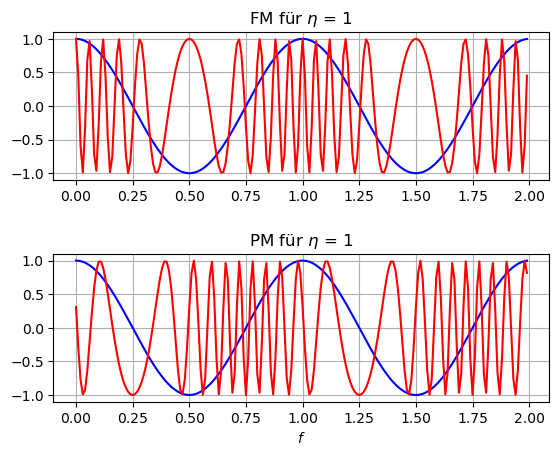

In [31]:
# eta = 1
ptr_eta = 6
nu_max1 = 5
carrier1 = 10
freq_info1 = 1

# time axis
t = np.arange(0,2,0.01)
# information signal
u = np.cos(2*np.pi*freq_info1*t)
ui = np.sin(2*np.pi*freq_info1*t)
# FM signal
xFM = np.cos(2*np.pi*(carrier1*t+eta[ptr_eta]*ui))
# PM signal
xPM = np.cos(2*np.pi*(carrier1*t+eta[ptr_eta]*u))

# graphische Darstellung
fig2 = plt.figure()
plt.subplots_adjust(hspace=0.5)

ax2a = fig2.add_subplot(211)
ax2a.plot(t,u,'b-')
ax2a.plot(t,xFM,'r-')
plt.grid(True)
plt.title('FM für $\eta$ = %d' %(eta[ptr_eta]))

ax2b = fig2.add_subplot(212)
ax2b.plot(t,u,'b-')
ax2b.plot(t,xPM,'r-')
plt.xlabel('$f$')
plt.grid(True)
plt.title('PM für $\eta$ = %d' %(eta[ptr_eta]))


/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_50646/6364933.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax3.stem(freq1,spectrum1,use_line_collection=True)
/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_50646/6364933.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax4.stem(freq2,spectrum2,use_line_collection=True)


Text(0.5, 1.0, '$\\eta=10$')

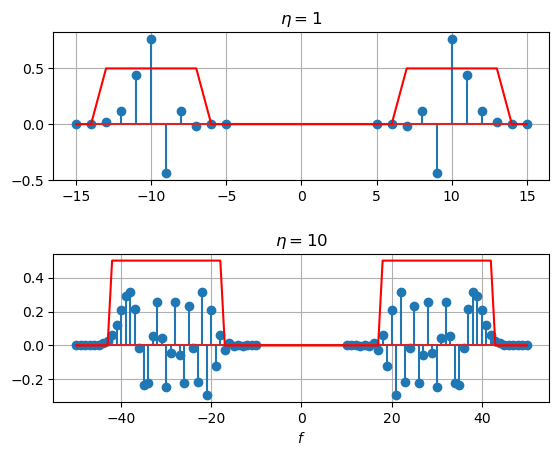

In [11]:
freq1 = carrier1 + np.arange(-nu_max1,nu_max1+1)*freq_info1
spectrum1 = np.zeros(2*nu_max1+1)
spectrum1[nu_max1] = special.jv(0,1)
for run in (np.arange(nu_max1)+1):
    # left of carrier
    spectrum1[nu_max1-run] = (-1)**run * special.jv(run,1)
    # right of carrier
    spectrum1[nu_max1+run] = special.jv(run,1)

spectrum1 = np.append(np.flipud(spectrum1),spectrum1)
freq1 = np.append(-np.flipud(freq1),freq1)
Bcarson1 = 2 * freq_info1 * 3
bandwidth1 = np.ones(len(spectrum1)) / 2
bandwidth1[freq1>carrier1+Bcarson1/2] = 0
bandwidth1[freq1<-(carrier1+Bcarson1/2)] = 0
bandwidth1[(freq1>-carrier1+Bcarson1/2) & (freq1<carrier1-Bcarson1/2)] = 0

#erg = np.append(freq1.reshape(len(spectrum1),1),spectrum1.reshape(len(spectrum1),1),axis=1)
#np.savetxt("NTpart3_anaMod_FMspectrum1.txt",erg)

# nu=10
ptr_eta = 51
nu_max2 = 20
carrier2 = 30
freq_info2 = 1
freq2 = carrier2 + np.arange(-nu_max2,nu_max2+1)*freq_info2
spectrum2 = np.zeros(2*nu_max2+1)
spectrum2[nu_max2] = special.jv(0,10)
for run in (np.arange(nu_max2)+1):
    # left of carrier
    spectrum2[nu_max2-run] = (-1)**run * special.jv(run,10)
    # right of carrier
    spectrum2[nu_max2+run] = special.jv(run,10)

spectrum2 = np.append(np.flipud(spectrum2),spectrum2)
freq2 = np.append(-np.flipud(freq2),freq2)
Bcarson2 = 2 * freq_info2 * 12
bandwidth2 = np.ones(len(spectrum2)) / 2
bandwidth2[freq2>carrier2+Bcarson2/2] = 0
bandwidth2[freq2<-(carrier2+Bcarson2/2)] = 0
bandwidth2[(freq2>-carrier2+Bcarson2/2) & (freq2<carrier2-Bcarson2/2)] = 0

#erg = np.append(freq2.reshape(len(spectrum2),1),spectrum2.reshape(len(spectrum2),1),axis=1)
#np.savetxt("NTpart3_anaMod_FMspectrum2.txt",erg)


# graphische Darstellung
fig3 = plt.figure()
plt.subplots_adjust(hspace=0.5)

ax3 = fig3.add_subplot(211)
ax3.stem(freq1,spectrum1,use_line_collection=True)
ax3.plot(freq1,bandwidth1,'r-')
plt.grid(True)
plt.title('$\eta=1$')

ax4 = fig3.add_subplot(212)
ax4.stem(freq2,spectrum2,use_line_collection=True)
ax4.plot(freq2,bandwidth2,'r-')
plt.xlabel('$f$')
plt.grid(True)
plt.title('$\eta=10$')

Da das Spektrum FM-modulierter Signale theoretisch unendlich ausgedehnt ist, wird in der Praxis eine Bandbegrenzung eingeführt. Die Carson-Bandbreite umfasst beispielsweise 99% der im Signal enthaltenen Energie und lautet

\begin{align*}
    B_{\mathrm{c}} = 2 f_1 (\eta+2) = 2 (\Delta F + 2 f_1) \; .
\end{align*}

Sie erstreckt sich symmetrisch um die Trägerfreqenz, wie im obigen Bild zu sehen ist.